# 1주차 EDA 과제 

- 데이터 : IBM HR Data
- 퇴직여부(범주형변수/이진분류)가 종속변수이기 때문에 Classification

## 파이썬을 이용하여 전처리 및 EDA를 진행해주세요.
- 결측치, 이상치 검토  
- 유의미한 시각화 5개 이상  
- 수치형 변수 간 상관관계 파악  
- 파생변수 생성

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load hr_data
hr_data = pd.read_csv('HR_Employee_Attrition.csv')
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### 결측치, 이상치 검토

In [3]:
# Check Missing Value
hr_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

결측치 없음  

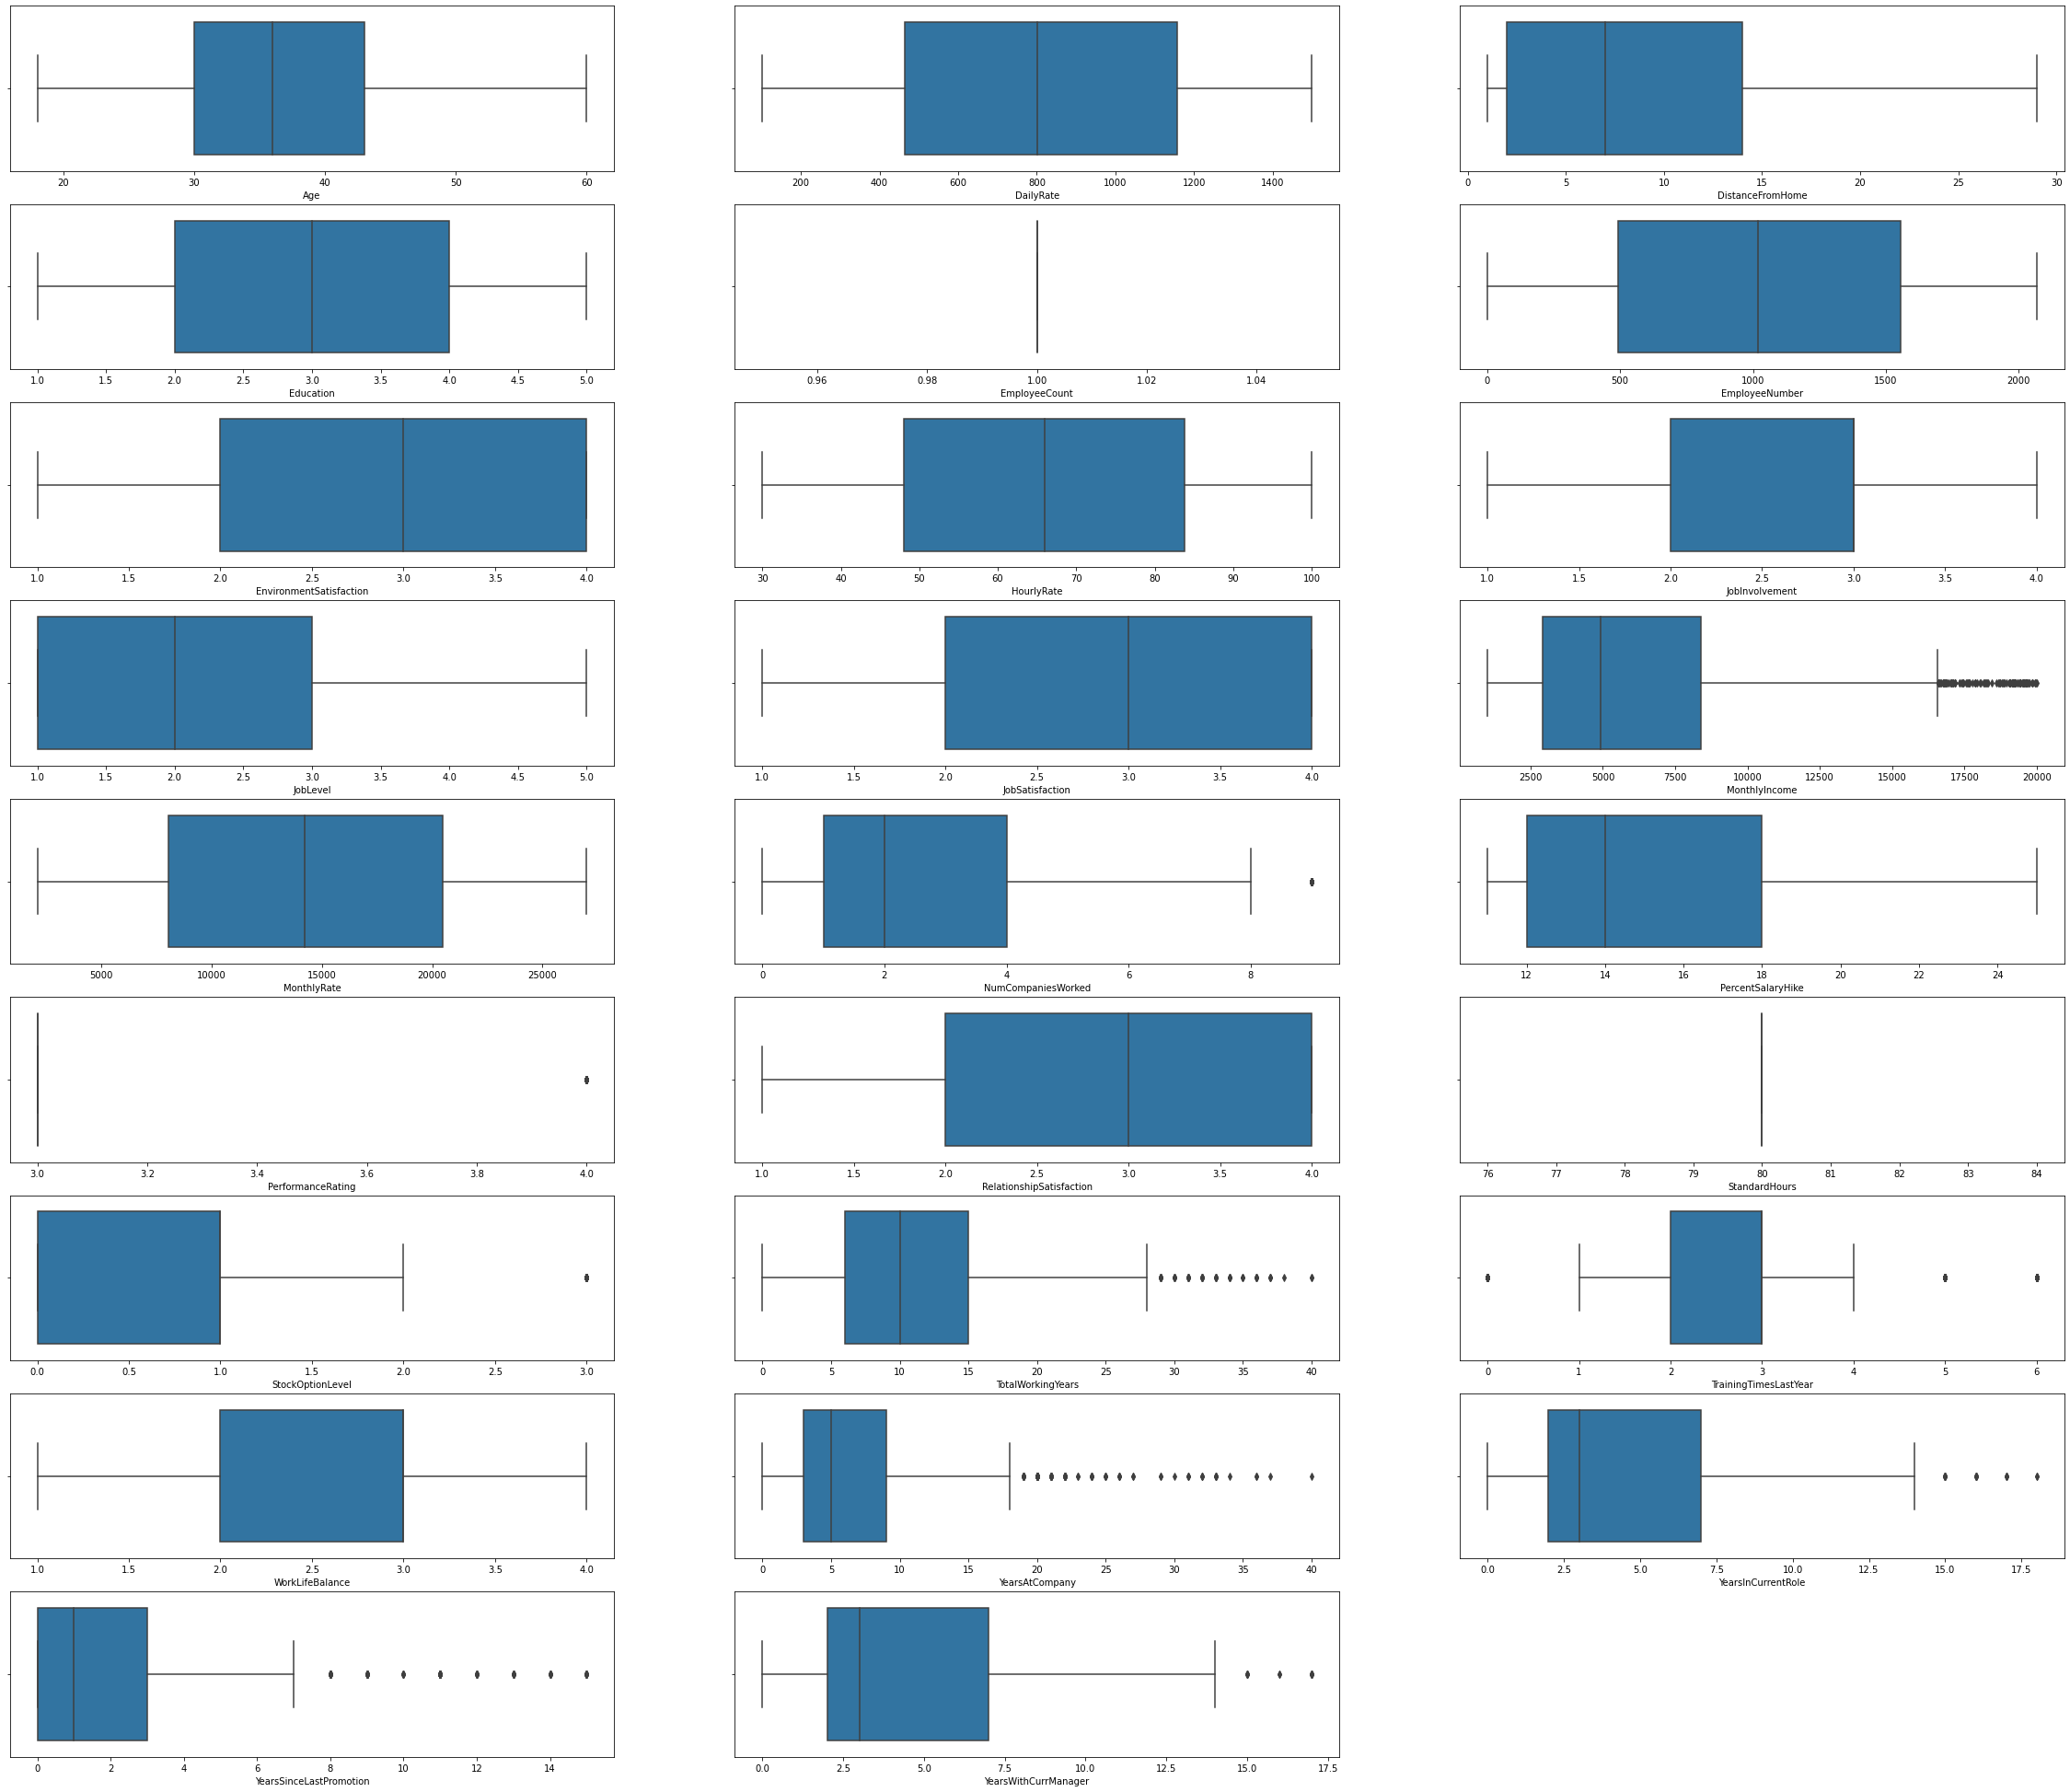

In [4]:
# Check Outiler (Numeric)
num_features = hr_data.select_dtypes(exclude = ['object']).columns

plt.figure(figsize=(40,35))
for i in range(len(num_features)):
    plt.subplot(9,3,i+1)
    sns.boxplot(hr_data[num_features[i]])

In [5]:
hr_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

- MonthlyIncome

In [6]:
hr_data['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [7]:
# MonthlyIncome 값이 16581을 넘는 값은 이상치로 판단
hr_data['MonthlyIncome'].quantile(0.75) + (hr_data['MonthlyIncome'].quantile(0.75) - hr_data['MonthlyIncome'].quantile(0.25)) * 1.5

16581.0

- NumCompaniesWorked

In [8]:
hr_data['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [9]:
hr_data['NumCompaniesWorked'].describe()

count    1470.000000
mean        2.693197
std         2.498009
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

- PerformanceRating

In [10]:
hr_data['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

- StockOptionLevel

In [11]:
hr_data['StockOptionLevel'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

- TotalWorkingYears

In [12]:
hr_data['TotalWorkingYears'].value_counts()

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64

In [13]:
hr_data['TotalWorkingYears'].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

In [14]:
# TotalWorkingYears 값이 28.5를 넘는 값은 이상치로 판단
hr_data['TotalWorkingYears'].quantile(0.75) + (hr_data['TotalWorkingYears'].quantile(0.75) - hr_data['TotalWorkingYears'].quantile(0.25)) * 1.5

28.5

- TrainingTimesLastYear

In [15]:
hr_data['TrainingTimesLastYear'].value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

In [16]:
hr_data['TrainingTimesLastYear'].describe()

count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64

- YearsAtCompany

In [17]:
hr_data['YearsAtCompany'].value_counts()

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64

In [18]:
hr_data['YearsAtCompany'].describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

In [19]:
# YearsAtCompany 값이 18.0을 넘는 값은 이상치로 판단
hr_data['YearsAtCompany'].quantile(0.75) + (hr_data['YearsAtCompany'].quantile(0.75) - hr_data['YearsAtCompany'].quantile(0.25)) * 1.5

18.0

- YearsInCurrentRole

In [20]:
hr_data['YearsInCurrentRole'].value_counts()

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64

In [21]:
hr_data['YearsInCurrentRole'].describe()

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

In [22]:
# YearsInCurrentRole 값이 14.5를 넘는 값은 이상치로 판단
hr_data['YearsInCurrentRole'].quantile(0.75) + (hr_data['YearsInCurrentRole'].quantile(0.75) - hr_data['YearsInCurrentRole'].quantile(0.25)) * 1.5

14.5

- YearsSinceLastPromotion

In [23]:
hr_data['YearsSinceLastPromotion'].value_counts()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

In [24]:
hr_data['YearsSinceLastPromotion'].describe()

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

In [25]:
# YearsSinceLastPromotion 값이 7.5를 넘는 값은 이상치로 판단
hr_data['YearsSinceLastPromotion'].quantile(0.75) + (hr_data['YearsSinceLastPromotion'].quantile(0.75) - hr_data['YearsSinceLastPromotion'].quantile(0.25)) * 1.5

7.5

- YearsWithCurrManager

In [26]:
hr_data['YearsWithCurrManager'].value_counts()

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
15      5
14      5
16      2
Name: YearsWithCurrManager, dtype: int64

In [27]:
hr_data['YearsWithCurrManager'].describe()

count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

In [28]:
# YearsWithCurrManager 값이 14.5를 넘는 값은 이상치로 판단
hr_data['YearsWithCurrManager'].quantile(0.75) + (hr_data['YearsWithCurrManager'].quantile(0.75) - hr_data['YearsWithCurrManager'].quantile(0.25)) * 1.5

14.5

이상치  
MonthlyIncome > 16581  
TotalWorkingYears > 28.5  
YearsAtCompany > 18.0  
YearsInCurrentRole > 14.5  
YearsSinceLastPromotion > 7.5  
YearsWithCurrManager > 14.5  

#### 유의미한 시각화 5개 이상

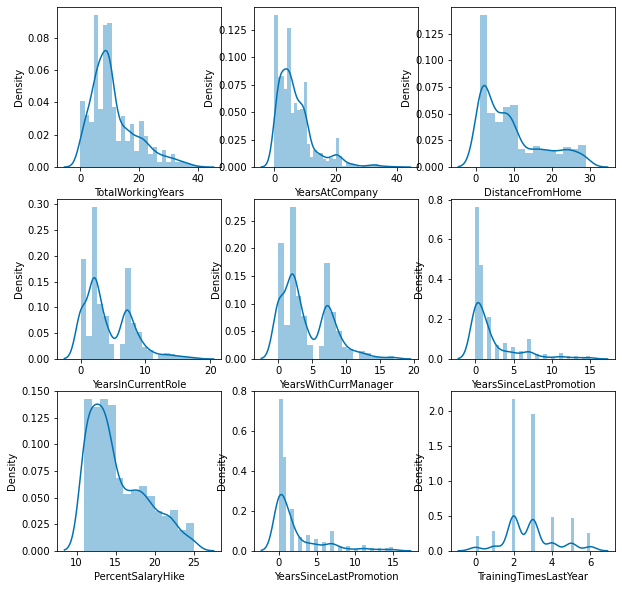

In [44]:
fig,ax = plt.subplots(3,3, figsize=(10,10))
sns.distplot(hr_data['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(hr_data['YearsAtCompany'], ax = ax[0,1]) 
sns.distplot(hr_data['DistanceFromHome'], ax = ax[0,2]) 
sns.distplot(hr_data['YearsInCurrentRole'], ax = ax[1,0]) 
sns.distplot(hr_data['YearsWithCurrManager'], ax = ax[1,1]) 
sns.distplot(hr_data['YearsSinceLastPromotion'], ax = ax[1,2]) 
sns.distplot(hr_data['PercentSalaryHike'], ax = ax[2,0]) 
sns.distplot(hr_data['YearsSinceLastPromotion'], ax = ax[2,1]) 
sns.distplot(hr_data['TrainingTimesLastYear'], ax = ax[2,2]) 
plt.show()

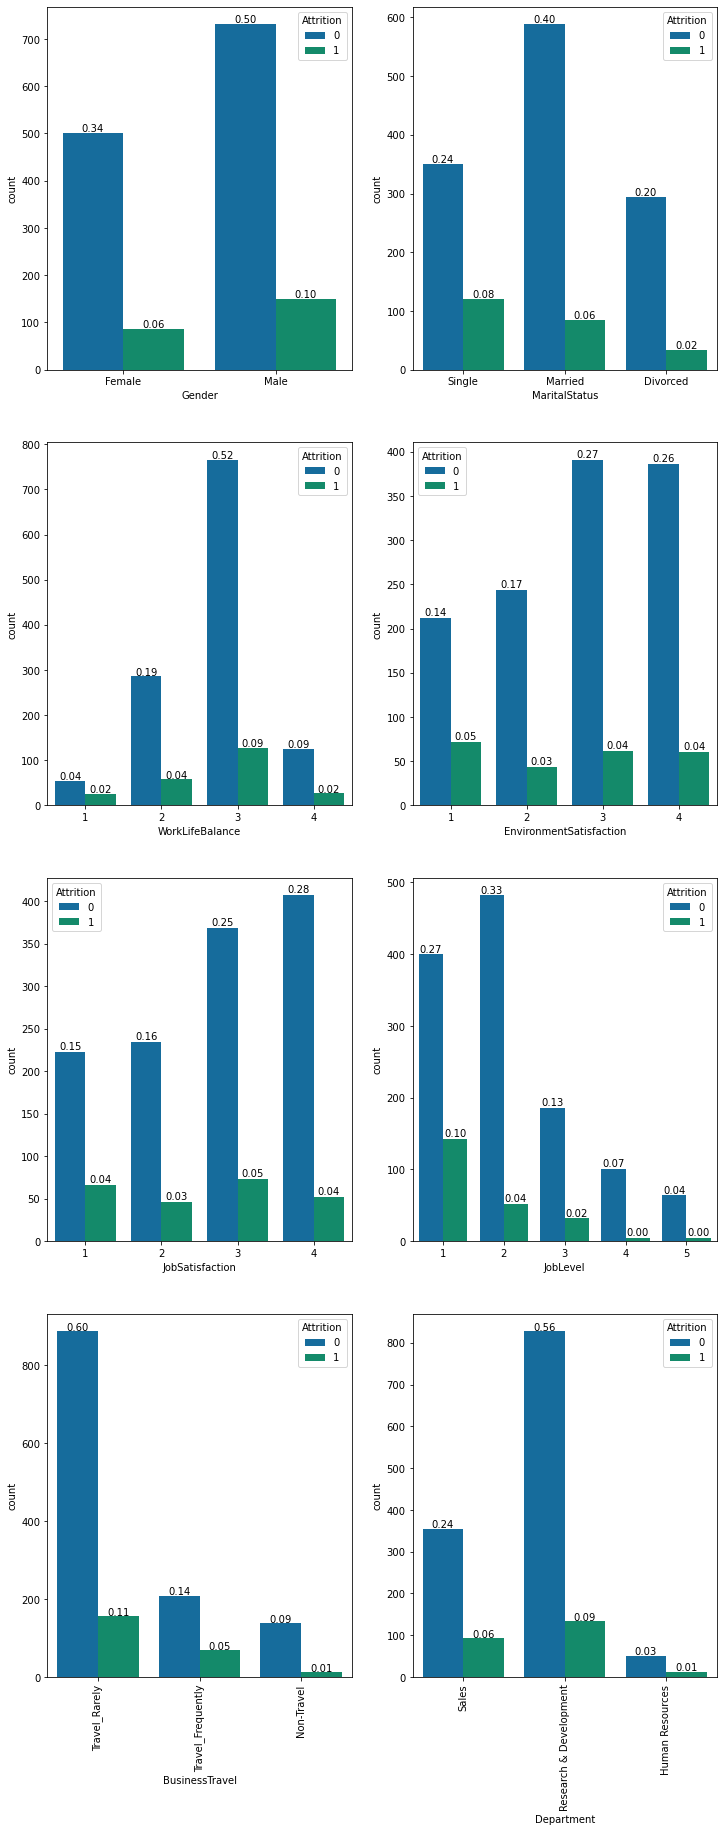

In [45]:
total_records = len(hr_data)
columns = ["Gender","MaritalStatus","WorkLifeBalance","EnvironmentSatisfaction","JobSatisfaction",
           "JobLevel","BusinessTravel","Department"]
plt.figure(figsize = (12,8))
j = 0
for i in columns:
    j += 1
    plt.subplot(4, 2, j)
    #sns.countplot(hr_data[i])
    ax1 = sns.countplot(data = hr_data, x = i, hue = "Attrition")
    if(j == 8 or j == 7):
        plt.xticks(rotation = 90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x() + p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center", rotation = 0) 

plt.subplots_adjust(bottom =- 0.9, top = 2)
plt.show()

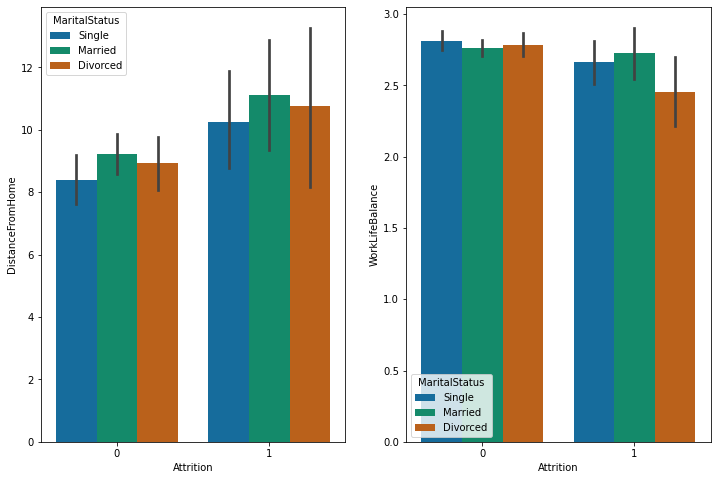

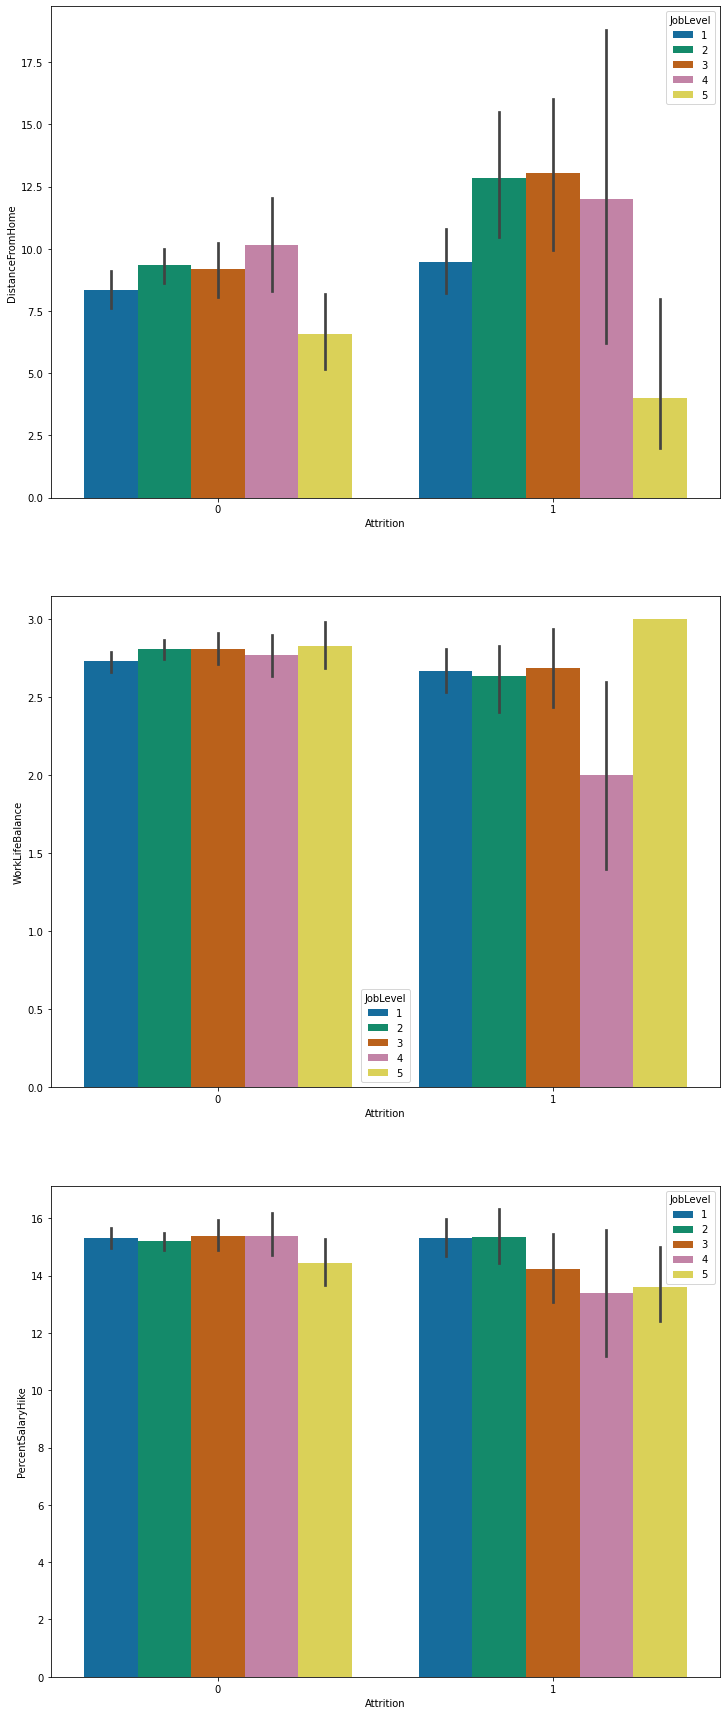

In [46]:
columns = ["DistanceFromHome", "WorkLifeBalance"]
plt.figure(figsize = (12,8))
j = 0
for i in columns:
    j += 1
    plt.subplot(1,2,j)
    sns.barplot(x = 'Attrition', y = hr_data[i], hue = "MaritalStatus", data = hr_data)

plt.show()

columns = ["DistanceFromHome", "WorkLifeBalance", "PercentSalaryHike"]
plt.figure(figsize = (12,8))
j = 0
for i in columns:
    j += 1
    plt.subplot(3, 1, j)
    sns.barplot(x = 'Attrition', y = hr_data[i], hue = "JobLevel", data = hr_data)

plt.subplots_adjust(bottom =- 0.9, top = 2)

plt.show()

In [29]:
hr_data['Attrition'] = hr_data['Attrition'].map({'No' : 0, 'Yes' : 1})

- Age

<AxesSubplot:xlabel='Age', ylabel='count'>

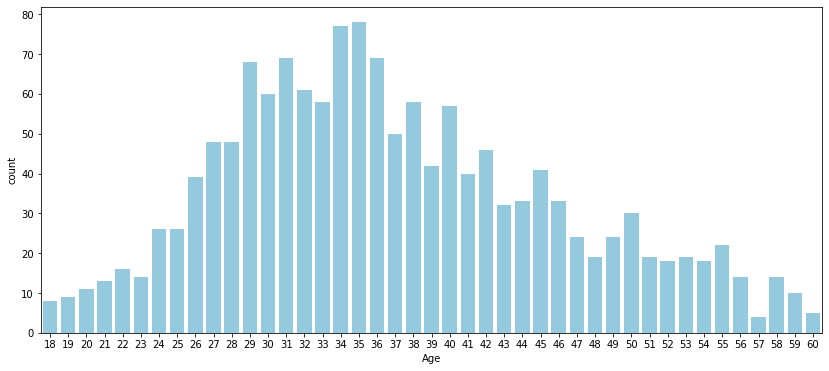

In [30]:
plt.figure(figsize = (14,6))
sns.countplot(hr_data['Age'], color = 'skyblue')

- BusinessTravel

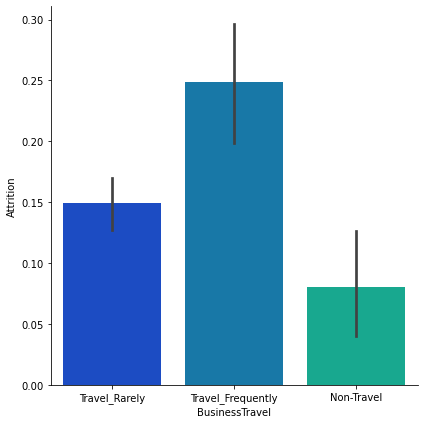

In [31]:
sns.factorplot(data = hr_data, x = 'BusinessTravel', y = 'Attrition',
               size = 6, aspect = 1, kind = 'bar', palette = 'winter')

- MonthlyIncome

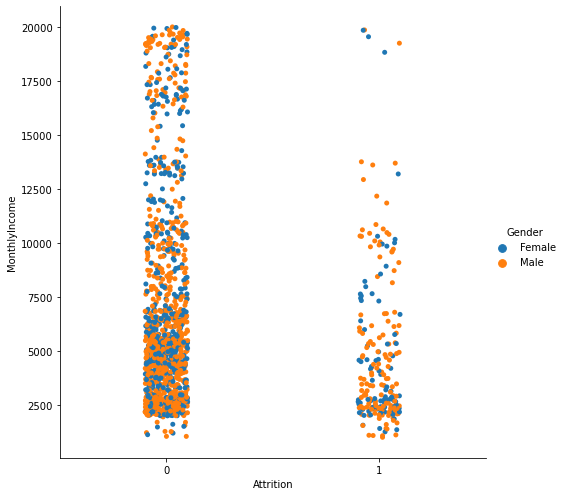

In [32]:
sns.catplot(x = "Attrition", y = "MonthlyIncome", data = hr_data, hue = 'Gender', size = 7)

Text(0.5, 1.0, 'Monthly Income in Percent by Attrition Status')

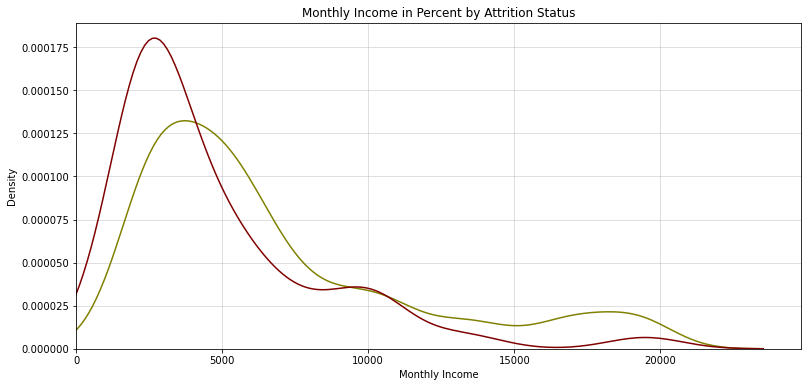

In [34]:
plt.figure(figsize = (13,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha = 0.5)
sns.kdeplot(hr_data.loc[hr_data['Attrition'] == 0, 'MonthlyIncome'], label = 'Active Employee', color='olive')
sns.kdeplot(hr_data.loc[hr_data['Attrition'] == 1, 'MonthlyIncome'], label = 'Employee Left', color='maroon')
plt.xlabel('Monthly Income')
plt.xlim(left = 0)
plt.ylabel('Density')
plt.title('Monthly Income in Percent by Attrition Status')

- Department

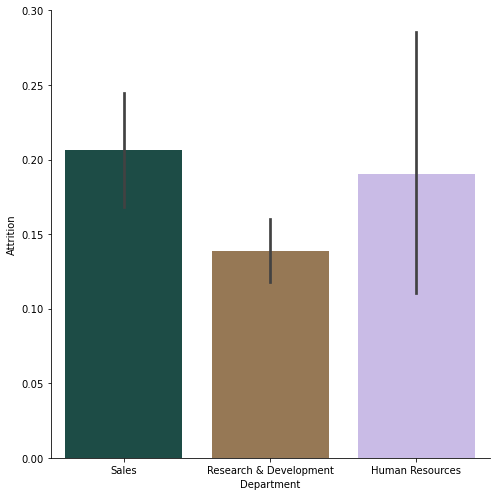

In [33]:
sns.factorplot(data = hr_data, x = 'Department', y = 'Attrition',
               size = 7, aspect = 1, kind = 'bar', palette = 'cubehelix')

- Education

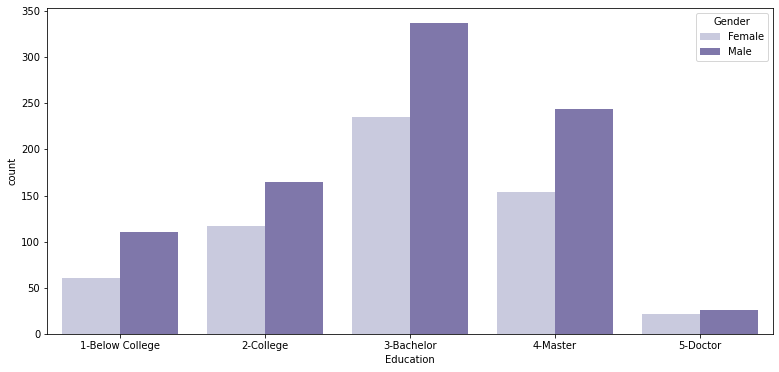

In [35]:
plt.figure(figsize = (13,6))
ax = sns.countplot(data = hr_data, x = 'Education', hue = 'Gender', palette = 'Purples')
ax.set_xticklabels(['1-Below College', '2-College', '3-Bachelor', '4-Master', '5-Doctor'])
plt.show()

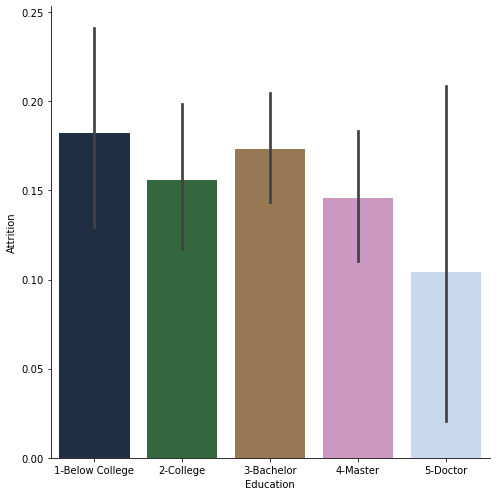

In [36]:
ax=sns.factorplot(data = hr_data, x = 'Education', y = 'Attrition',
                  size = 7, aspect = 1, kind = 'bar', palette = "cubehelix")
ax.set_xticklabels(['1-Below College', '2-College', '3-Bachelor', '4-Master' , '5-Doctor'])

- EducationField 

Text(0.5, 1.0, 'Education Field Counts')

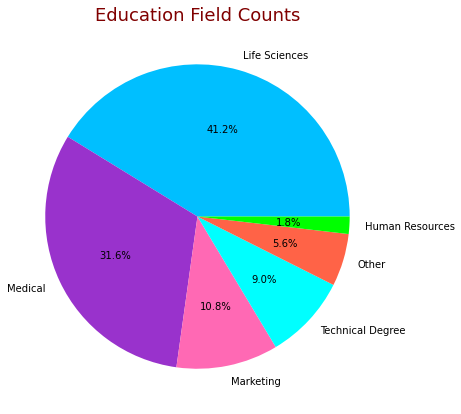

In [37]:
labels = hr_data.EducationField.value_counts().index
sizes = hr_data.EducationField.value_counts().values
colors = ["deepskyblue", "darkorchid", "hotpink", "cyan", "tomato", "lime"]
plt.figure(figsize = (7,7))
plt.pie(sizes, labels = labels, colors = colors, autopct = "%1.1f%%")
plt.title("Education Field Counts", fontsize = 18, color = 'maroon')

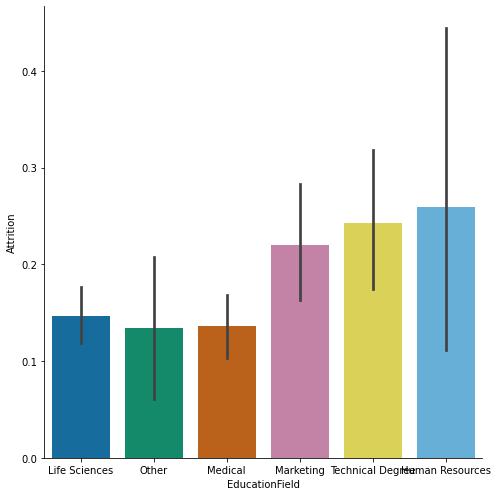

In [39]:
sns.factorplot(data = hr_data, x = 'EducationField', y = 'Attrition',
                 size = 7, aspect = 1, kind = 'bar')

- EnvironmentSatisfaction

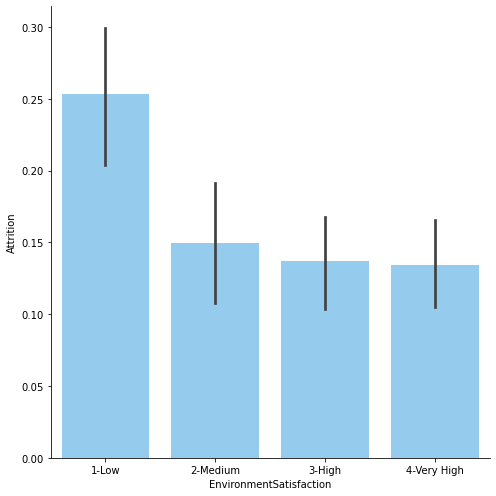

In [40]:
ax = sns.factorplot(data = hr_data, x = 'EnvironmentSatisfaction', y = 'Attrition',
                    size = 7, aspect = 1, kind = 'bar', color = 'lightskyblue')
ax.set_xticklabels(['1-Low', '2-Medium', '3-High', '4-Very High'])

- Job satisfation

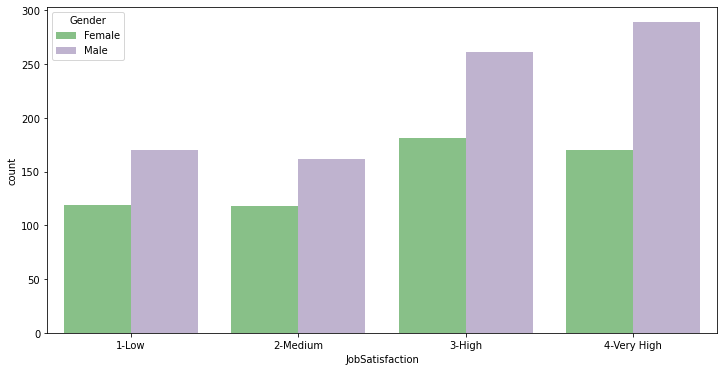

In [41]:
plt.figure(figsize = (12,6))
ax = sns.countplot(data = hr_data, x = 'JobSatisfaction', hue = 'Gender', palette = 'Accent')
ax.set_xticklabels(['1-Low', '2-Medium', '3-High', '4-Very High'])
plt.show()

[Text(0, 0, '1-Low'),
 Text(1, 0, '2-Medium'),
 Text(2, 0, '3-High'),
 Text(3, 0, '4-Very High')]

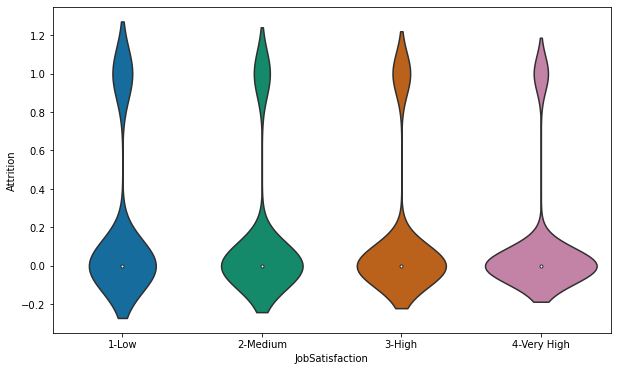

In [42]:
plt.figure(figsize = (10,6))
ax = sns.violinplot(data = hr_data, x = 'JobSatisfaction', y = 'Attrition');
ax.set_xticklabels(['1-Low', '2-Medium', '3-High', '4-Very High'])

- Hourly rate

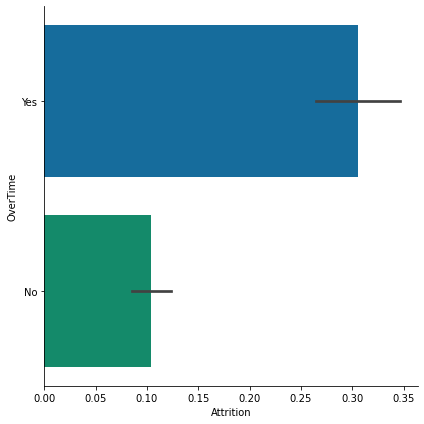

In [43]:
sns.factorplot(data = hr_data, y = 'OverTime', x = 'Attrition', size = 6, aspect = 1, kind = 'bar')

#### 수치형 변수 간 상관관계 파악

In [31]:
hr_data[num_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   DistanceFromHome          1470 non-null   int64
 3   Education                 1470 non-null   int64
 4   EmployeeCount             1470 non-null   int64
 5   EmployeeNumber            1470 non-null   int64
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   HourlyRate                1470 non-null   int64
 8   JobInvolvement            1470 non-null   int64
 9   JobLevel                  1470 non-null   int64
 10  JobSatisfaction           1470 non-null   int64
 11  MonthlyIncome             1470 non-null   int64
 12  MonthlyRate               1470 non-null   int64
 13  NumCompaniesWorked        1470 non-null   int64
 14  PercentSalaryHike         1470 non-null 

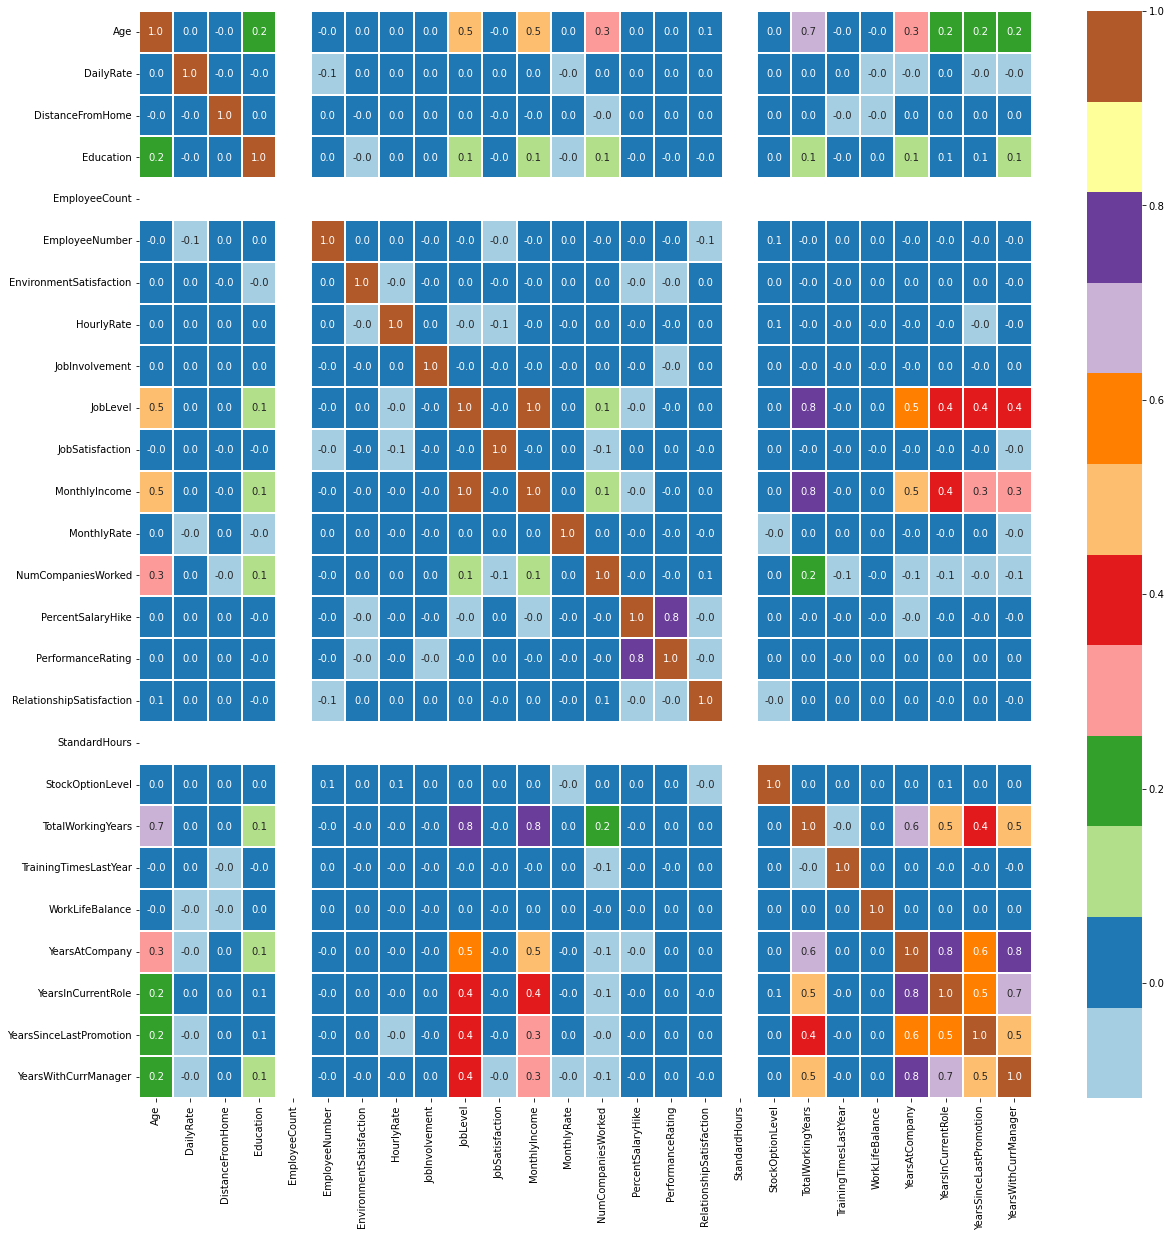

In [34]:
# num_features = hr_data.select_dtypes(exclude = ['object']).columns

f, ax =  plt.subplots(figsize=(20,20))
sns.heatmap(hr_data[num_features].corr(), annot=True, linewidth=.4, ax=ax, fmt='.1f', cmap="Paired")
plt.show()

#### 파생변수 생성

- 집 거리와 비교했을 때 급여가 퇴사여부에 영향을 미칠 것이라고 판단  
- 일 대비 급여의 수준을 집과의 거리로 나누어서 파생변수 생성

In [49]:
hr_data['Business Pay for distance'] = hr_data['DailyRate'] / hr_data['DistanceFromHome']
hr_data['Hour Pay for distance'] = hr_data['HourlyRate'] / hr_data['DistanceFromHome']
hr_data['Month Pay for distance'] = hr_data['MonthlyRate'] / hr_data['DistanceFromHome']
hr_data['Month Income for distance'] = hr_data['MonthlyIncome'] / hr_data['DistanceFromHome']

- 경력 기간 대비 월급이 퇴사여부에 중요한 역할을 미칠 것이라고 판단  
- 월 소득을 경력기간으로 나누어서 파생변수를 생성

In [51]:
hr_data['Month Income for Experience'] = hr_data['MonthlyIncome'] / hr_data['TotalWorkingYears']

- 연 소득 + 스톡옵션(스톡옵션의 가격을 대략적으로 월 소득이라고 가정)

In [53]:
hr_data['YearlyIncome'] = hr_data['MonthlyIncome'] * 12 + hr_data['StockOptionLevel'] * hr_data['MonthlyIncome']